In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
# preprocessing dataset
def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    
    sales_data = get_column(data, 3)
    
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y

In [4]:
X, y = prepare_data('advertising.csv')
example_list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(example_list)

[624.1, 175.1, 300.5, 78.9]


In [28]:
# helper functions
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355,
                     -0.002307860847821344 , 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return x1*w1 + x2*w2 + x3*w3 + b

def compute_loss_mse(y, y_hat):
    return (y - y_hat)**2

def compute_loss_mae(y, y_hat):
    return abs(y - y_hat)

def compute_gradient_wi(xi, y, y_hat):
    return -2*xi*(y - y_hat)

def compute_gradient_b(y, y_hat):
    return -2*(y - y_hat)

def update_weight_wi(wi, dwi, lr):
    return wi - lr*dwi

def update_weight_b(b, db, lr):
    return b - lr*db

# main function
def linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # forward pass
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss_mse(y, y_hat)
            # loss = compute_loss_mae(y, y_hat)
            
            # backward pass
            dw1 = compute_gradient_wi(x1, y, y_hat)
            dw2 = compute_gradient_wi(x2, y, y_hat)
            dw3 = compute_gradient_wi(x3, y, y_hat)
            db = compute_gradient_b(y, y_hat)
            
            # update weights
            w1 = update_weight_wi(w1, dw1, lr)
            w2 = update_weight_wi(w2, dw2, lr)
            w3 = update_weight_wi(w3, dw3, lr)
            b = update_weight_b(b, db, lr)
            
            losses.append(loss)
    return (w1, w2, w3, b), losses

In [8]:
y_hat = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_hat)

1.0


In [10]:
l = compute_loss_mse(y=0.5, y_hat=1)
print(l)

0.25


In [11]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [18]:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [12]:
after_wi = update_weight_wi(wi=1.0, dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [13]:
after_b = update_weight_b(b=0.5, db=-1.0, lr=1e-5)
print(after_b)

0.50001


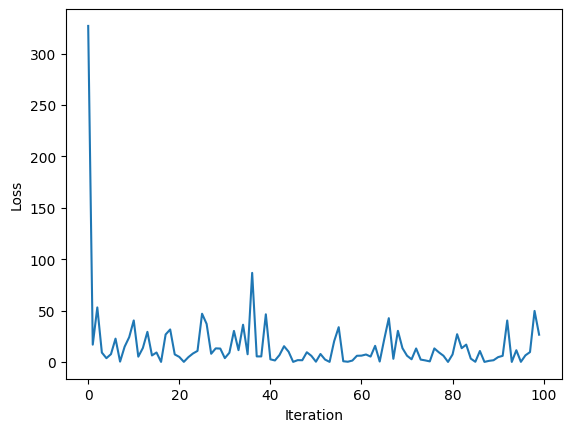

In [30]:
(w1, w2, w3, b), losses = linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [16]:
w1, w2, w3, b

(0.07405984066396477,
 0.15917360263437663,
 0.017561197559948935,
 0.13924260940219846)

In [19]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b), _ = linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predicted sales: {sales:.2f}')

Predicted sales: 8.18


In [22]:
l = compute_loss_mae(y=1, y_hat=0.5)
print(l)

0.5


In [24]:
def linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # forward pass
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y, y_hat)
            
            # backward pass
            dw1 = compute_gradient_wi(x1, y, y_hat)
            dw2 = compute_gradient_wi(x2, y, y_hat)
            dw3 = compute_gradient_wi(x3, y, y_hat)
            db = compute_gradient_b(y, y_hat)
            
            loss_total += loss
            dw1_total += dw1
            dw2_total += dw2
            dw3_total += dw3
            db_total += db
        
        # update weights
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)
        
    return (w1, w2, w3, b), losses

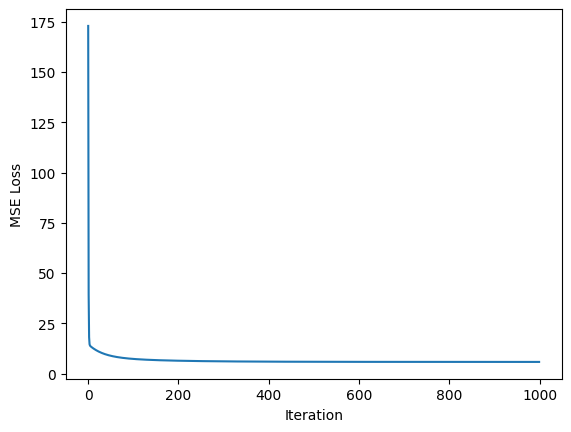

In [26]:
(w1, w2, w3, b), losses = linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.show()

In [27]:
w1, w2, w3, b

(0.06710990754044266,
 0.15756173831487585,
 0.029619799386084403,
 0.015537523797089711)